In [1]:
#AI-Based Forest Fire & Smoke Detection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_red            3000 non-null   float64
 1   mean_green          3000 non-null   float64
 2   mean_blue           3000 non-null   float64
 3   red_blue_ratio      3000 non-null   float64
 4   intensity_std       3000 non-null   float64
 5   edge_density        3000 non-null   float64
 6   smoke_whiteness     3000 non-null   float64
 7   haze_index          3000 non-null   float64
 8   hot_pixel_fraction  3000 non-null   float64
 9   local_contrast      3000 non-null   float64
 10  fire_label          3000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 257.9 KB
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       485
           1       0.94      0.88      0.91       265

    accuracy                           

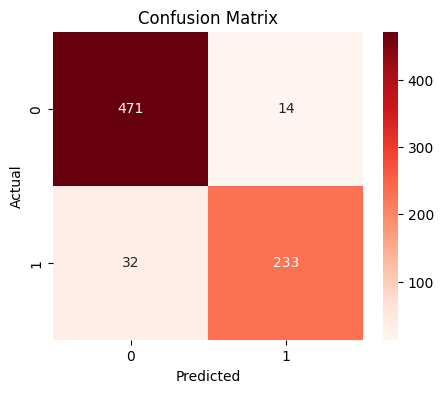

ROC-AUC Score: 0.9736082474226804


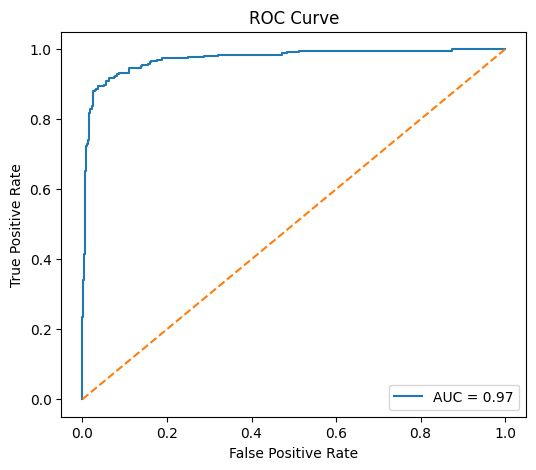

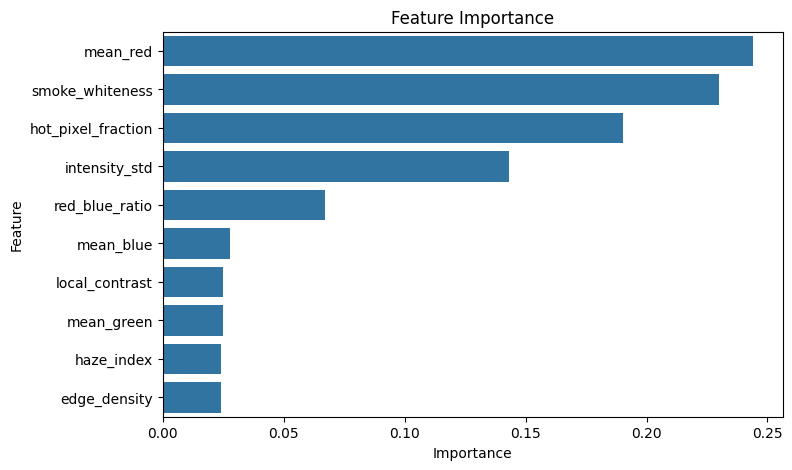

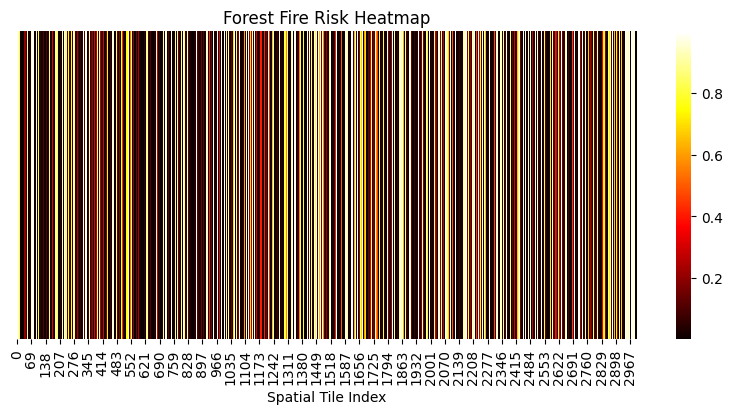

In [2]:
# AI-Based Forest Fire & Smoke Detection
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
#Load & Understand the Dataset

df = pd.read_csv("C:/Users/Lenovo/Downloads/Forest Fire Smoke Dataset - Sheet1.csv")
df.head()
df.info()
df.describe()
#Data Preprocessing

X = df.drop("fire_label", axis=1)
y = df["fire_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
#Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Train Machine Learning Model (Task 2)
#Random Forest (Best for tabular + explainability)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train_scaled, y_train)

#Model Evaluation

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
#Classification Report
print(classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#ROC–AUC Curve
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#Feature Importance
importances = model.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_df)
plt.title("Feature Importance")
plt.show()


#Spatial Risk Analysis & Heatmap
df["fire_risk_score"] = model.predict_proba(
    scaler.transform(X)
)[:, 1]

#Fire Risk Heatmap

plt.figure(figsize=(10,4))
sns.heatmap(
    df[["fire_risk_score"]].T,
    cmap="hot",
    cbar=True
)
plt.title("Forest Fire Risk Heatmap")
plt.xlabel("Spatial Tile Index")
plt.yticks([])
plt.show()


# Drone Deployment Strategy ( Report)

# Recommendations:

# Deploy drones first in high-risk tiles (risk > 0.7)

# Use thermal cameras in regions with high hot_pixel_fraction

# Increase monitoring frequency in smoke-heavy zones

# Enable real-time alerts for emergency responders

# Use drones for early-stage detection before fire spreads

# Reflection & Improvements 

# Limitations:

# No real spatial coordinates

# Tile-level data only (no raw images)

# Smoke vs fire not separated

# Future Improvements:

# Add GPS coordinates

# Use CNNs on aerial images

# Real-time drone video streams

# Multi-class classification (fire / smoke / normal)